# Insurance Upselling Machine Learning Evaluation & Supervised Learning

## About Dataset

The data used comes from an insurance company client seeking assistance in building a predictive model. This data is most likely internal company data used to analyze customer behavior and predict customer interest in vehicle insurance.

1. Gender: Jenis kelamin pelanggan, dapat berupa "Male" atau "Female".

2. Age: Usia pelanggan, adalah variabel numerik yang mewakili usia pelanggan.

3. Driving_License: Variabel biner yang menunjukkan apakah pelanggan sudah memiliki SIM atau tidak.

4. Region_Code: Kode wilayah unik untuk pelanggan, digunakan untuk mengidentifikasi wilayah pelanggan.

5. Previously_Insured: Variabel biner yang menunjukkan apakah pelanggan sudah memiliki Asuransi Kendaraan atau tidak.

6. Vehicle_Age: Usia kendaraan pelanggan, mungkin berupa "1-2 Years", "< 1 Year", atau "> 2 Years".

7. Vehicle_Damage: Variabel biner yang menunjukkan apakah kendaraan pelanggan pernah mengalami kerusakan atau tidak.

8. Annual_Premium: Jumlah premi yang harus dibayar pelanggan dalam setahun.

9. Policy_Sales_Channel: Kode anonim yang menggambarkan saluran komunikasi dengan pelanggan.

10. Vintage: Jumlah hari pelanggan telah menjadi pelanggan perusahaan.

11. Response: Variabel target yang menunjukkan apakah pelanggan tertarik pada Asuransi Kendaraan atau tidak (1 untuk tertarik, 0 untuk tidak tertarik).


### 1. Dataset Overview 

In [99]:
import pandas as pd
df = pd.read_csv('dataset_Insurance Upselling.csv', sep=';')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.000,Male,44,1,28.000,0.000,> 2 Years,Yes,"40,454.000",26.000,217,1
1,2.000,Male,76,1,3.000,0.000,1-2 Year,No,"33,536.000",26.000,183,0
2,3.000,Male,47,1,28.000,0.000,> 2 Years,Yes,"38,294.000",26.000,27,1
3,4.000,Male,21,1,11.000,1.000,< 1 Year,No,"28,619.000",152.000,203,0
4,5.000,Female,29,1,41.000,1.000,< 1 Year,No,"27,496.000",152.000,39,0


## Data Preparation

### Data Cleaning

Data cleaning involves identifying incomplete values in the table. Use the count() function to clean up your data. The count() function determines the number of values in each column. If a column contains null, the columns are not identical.

#### 1. Missing Values

In [100]:
df.isnull().sum()

id                      3678
Gender                  3357
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured      1999
Vehicle_Age                0
Vehicle_Damage          1093
Annual_Premium             0
Policy_Sales_Channel     541
Vintage                    0
Response                   0
dtype: int64

In [101]:
# Fill kolom 'id' dengan meneruskan row yang hilang
df.loc[df[df['id'].isna()].index, 'id'] = df[df['id'].isna()].index + 1

# Fill kolom 'Gender' dengan nilai mode
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)

# Drop nan values pada semua kolom
df = df.dropna()
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_38840\1648077542.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Duplicated Data

In [102]:
df.duplicated().any()

True

In [103]:
# Checking duplicated data after cleaning
df = df.drop_duplicates()
df.duplicated().any()

False

### 3. Change Data type

In [104]:
df= df.astype({
    'id' : 'int',
    'Region_Code' : 'int',
    'Previously_Insured' : 'int',
    'Annual_Premium' : 'int',
    'Policy_Sales_Channel' : 'int',
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    378137 non-null  int32 
 1   Gender                378137 non-null  object
 2   Age                   378137 non-null  int64 
 3   Driving_License       378137 non-null  int64 
 4   Region_Code           378137 non-null  int32 
 5   Previously_Insured    378137 non-null  int32 
 6   Vehicle_Age           378137 non-null  object
 7   Vehicle_Damage        378137 non-null  object
 8   Annual_Premium        378137 non-null  int32 
 9   Policy_Sales_Channel  378137 non-null  int32 
 10  Vintage               378137 non-null  int64 
 11  Response              378137 non-null  int64 
dtypes: int32(5), int64(4), object(3)
memory usage: 30.3+ MB


### 4. Feature Encoding

In [105]:
# Label Encoding
from sklearn.preprocessing import  LabelEncoder
label_encoder = LabelEncoder()
df['Gender_Label'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage_Label'] = label_encoder.fit_transform(df['Vehicle_Damage'])
# df['Vehicle_Age_Label'] = label_encoder.fit_transform(df['Vehicle_Age'])
 
# One Hot Encoding
df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=False, dtype=int)

# df_encoded = df.drop(['Gender', 'Vehicle_Damage', 'Vehicle_Age'], axis=1)
df_encoded = df.drop(['Gender', 'Vehicle_Damage'], axis=1)

### 5. Outliers

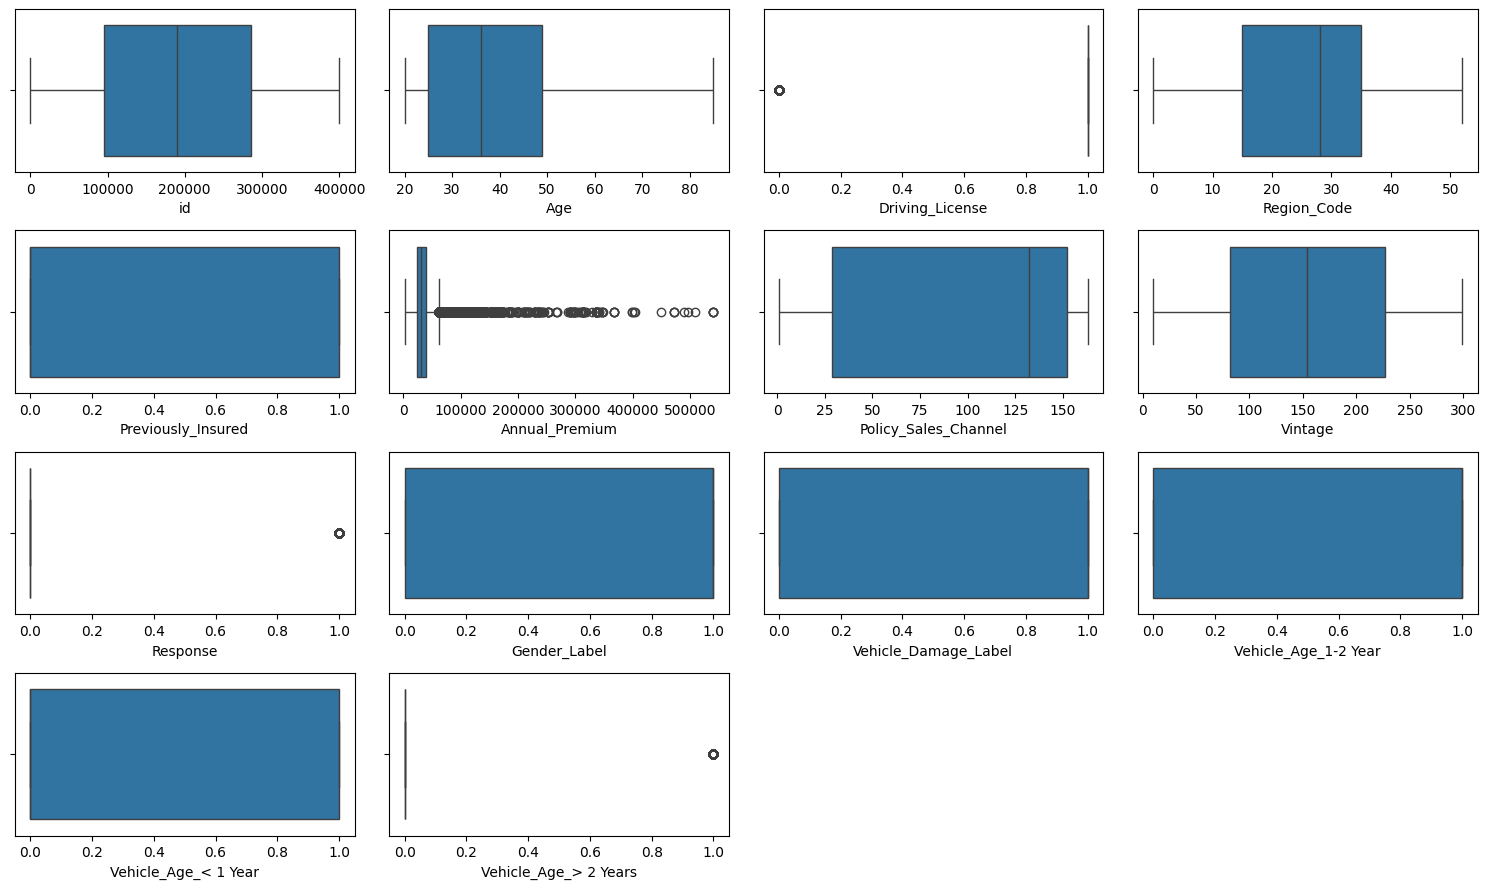

In [106]:
# Box plot checking
import matplotlib.pyplot as plt
import seaborn as sns
cols = 4
rows = 4
num_cols = df_encoded.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot( rows, cols, i+1)

    sns.boxplot(x=df_encoded[col], ax=ax)

fig.tight_layout()
plt.show()

In [107]:
# Function to check mean values
def mean(x):
    return '{:,.3f}'.format(x.mean())

# Funtion to check median values
def median(x):
    return '{:,.3f}'.format(x.median())

# Function to check mode values
def mode(x):
    return '{:,.3f}'.format(x.mode().iloc[0])

# Function to check interquartile
def interquartile(x):
    result = x.quantile(0.75) - x.quantile(0.25)
    return result

# Function to check standard deviation
def standard_dev(x):
    return '{:,.0f}'.format(x.std()) 

# Function to check max outliers
def outliers_max(x):
    outliers = 1.5 * interquartile(x)
    result = x.quantile(0.25)-outliers
    return result

# Function to check min outliers
def outliers_min(x):
    outliers = 1.5 * interquartile(x)
    result = x.quantile(0.75)-outliers
    return result

In [108]:
df_encoded.select_dtypes(include=['int', 'float']).agg(['median', mode, interquartile, standard_dev, outliers_max, outliers_min]).reset_index()

,index,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,median,"190,654.000",36.000,1.000,28.000,0.000,"31,671.000",132.000,154.000,0.000,1.000,1.000,1.000,0.000,0.000
1,mode,"2,255.000",24.000,1.000,28.000,0.000,"2,630.000",152.000,256.000,0.000,1.000,1.000,1.000,0.000,0.000
2,interquartile,"190,684.000",24.000,0.000,20.000,1.000,"14,992.000",123.000,145.000,0.000,1.000,1.000,1.000,1.000,0.000
3,standard_dev,"110,078",16,0,13,0,"17,210",54,84,0,0,0,0,0,0
4,outliers_max,"-190,755.000",-11.000,1.000,-15.000,-1.500,"1,920.000",-155.500,-135.500,0.000,-1.500,-1.500,-1.500,-1.500,0.000
5,outliers_min,-71.000,13.000,1.000,5.000,-0.500,"16,912.000",-32.500,9.500,0.000,-0.500,-0.500,-0.500,-0.500,0.000


In [109]:
pd.options.display.float_format = '{:,.3f}'.format
df_encoded.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,"378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000","378,137.000"
mean,"190,618.046",38.824,0.998,26.388,0.458,"30,565.970",112.029,154.333,0.123,0.545,0.505,0.526,0.432,0.042
std,"110,078.313",15.513,0.046,13.230,0.498,"17,209.746",54.203,83.676,0.328,0.498,0.500,0.499,0.495,0.201
min,1.000,20.000,0.000,0.000,0.000,"2,630.000",1.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,"95,271.000",25.000,1.000,15.000,0.000,"24,408.000",29.000,82.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,"190,654.000",36.000,1.000,28.000,0.000,"31,671.000",132.000,154.000,0.000,1.000,1.000,1.000,0.000,0.000
75%,"285,955.000",49.000,1.000,35.000,1.000,"39,400.000",152.000,227.000,0.000,1.000,1.000,1.000,1.000,0.000
max,"400,067.000",85.000,1.000,52.000,1.000,"540,165.000",163.000,299.000,1.000,1.000,1.000,1.000,1.000,1.000


In [110]:
# from scipy import stats
# import numpy as np
# z_scores = np.abs(stats.zscore(df_encoded))
# data_clean = df_encoded[(z_scores < 3).all(axis=1)]

## Feature Engineering

### 1. Heatmap

<Axes: >

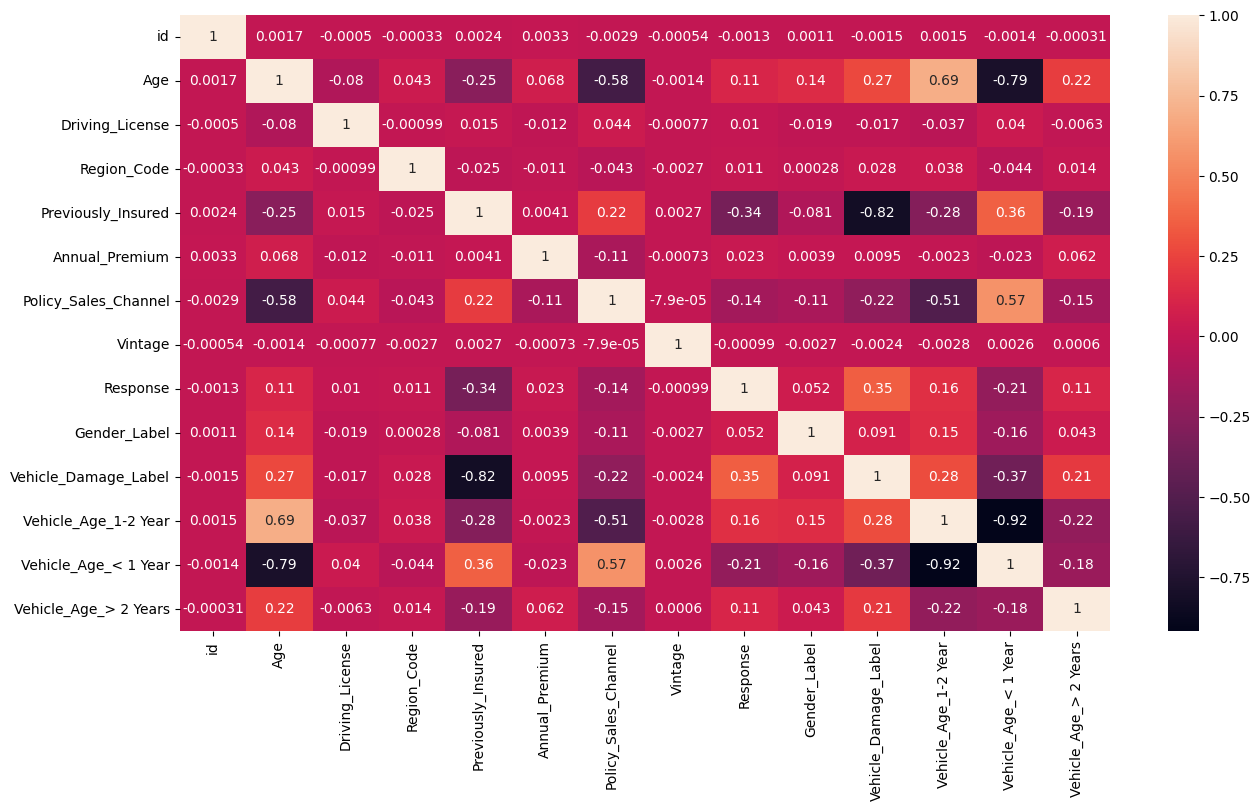

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(df_encoded.corr(), annot=True)

### 2. Chi Square

In [112]:
from sklearn.feature_selection import chi2

X = df_encoded.drop(columns=['Response'], axis=1)
y = df_encoded['Response']

chi2_stat, p_val = chi2(X, y)

results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stat,
    'p-value': p_val
})
results.sort_values(by=['Chi2 Stat'], ascending=False)

,Feature,Chi2 Stat,p-value
5,Annual_Premium,"1,891,462.384",0.000
6,Policy_Sales_Channel,"192,289.503",0.000
0,id,"41,086.411",0.000
1,Age,"28,938.245",0.000
4,Previously_Insured,"23,837.869",0.000
9,Vehicle_Damage_Label,"23,521.063",0.000
11,Vehicle_Age_< 1 Year,"9,452.155",0.000
10,Vehicle_Age_1-2 Year,"4,844.138",0.000
12,Vehicle_Age_> 2 Years,"4,318.982",0.000
8,Gender_Label,462.449,0.000


#### Summary of Chi Square

1. Chi-Square Statistic:

    The chi-square statistic indicates how much the observed data deviates from the expected data under the null hypothesis.
    A higher chi-square statistic generally suggests a stronger relationship between the feature and the target variable.

2. P-Value:

    The p-value indicates the probability that the observed association between the feature and the target variable is due to chance.
    A p-value of 0.000 (often presented as < 0.001) indicates a very strong association, suggesting that the feature is statistically significant.

In [123]:
# df_model = df_encoded[['Age', 'Previously_Insured', 'Vehicle_Damage_Label', 'Response']]
df_model = df_encoded.drop(['id', 'Annual_Premium'], axis=1)

## Modeling

### 1. Train & Test

In [124]:
from sklearn.model_selection import train_test_split
X = df_model.drop(['Response'], axis=1)
y = df_model['Response']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. Modeling


In [126]:
# Define classifiers
from xgboost import XGBClassifier

classifiers = {
    # 'KNN': KNeighborsClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'Random Forest': RandomForestClassifier(),
    # 'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Logistic Regression': LogisticRegression()
}

In [131]:
def plot_confusion_matrix(cm, model_name):
    # Define the labels
    names = ['True Negative','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, cmap='Oranges', fmt='', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(classifiers, X_train, y_train, X_test, y_test):
    results = []
    for name, clf in classifiers.items():
        print(f"Evaluating model: {name}")
        clf.fit(X_train, y_train)

        # Evaluate on training data
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')

        # Evaluate on test data
        y_test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
            'Train Precision': train_precision, 'Test Precision': test_precision,
            'Train Recall': train_recall, 'Test Recall': test_recall,
            'Train F1-Score': train_f1, 'Test F1-Score': test_f1,
            'Confusion Matrix': conf_matrix
        })

        # Print model results
        print(f"Model: {name}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Train Precision: {train_precision:.4f}")
        print(f"Test Precision: {test_precision:.4f}")
        print(f"Train Recall: {train_recall:.4f}")
        print(f"Test Recall: {test_recall:.4f}")
        print(f"Train F1-Score: {train_f1:.4f}")
        print(f"Test F1-Score: {test_f1:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print()

        # Plot confusion matrix with annotations
        plot_confusion_matrix(conf_matrix, name)

    results_df = pd.DataFrame(results)

    return results_df


Evaluating model: XGBoost
Model: XGBoost
Train Accuracy: 0.8786
Test Accuracy: 0.8771
Train Precision: 0.8668
Test Precision: 0.8221
Train Recall: 0.8786
Test Recall: 0.8771
Train F1-Score: 0.8236
Test F1-Score: 0.8213
Confusion Matrix:
[[66276    75]
 [ 9222    55]]



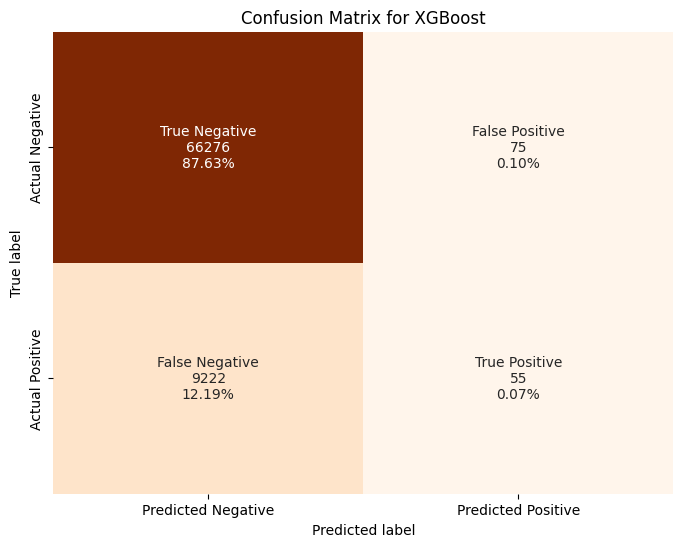

In [128]:
results_without_smote = evaluate_model(classifiers, X_train_scaled, y_train, X_test_scaled, y_test)

In [129]:
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

Evaluating model: XGBoost
Model: XGBoost
Train Accuracy: 0.8702
Test Accuracy: 0.7841
Train Precision: 0.8759
Test Precision: 0.8661
Train Recall: 0.8702
Test Recall: 0.7841
Train F1-Score: 0.8697
Test F1-Score: 0.8129
Confusion Matrix:
[[53240 13111]
 [ 3217  6060]]



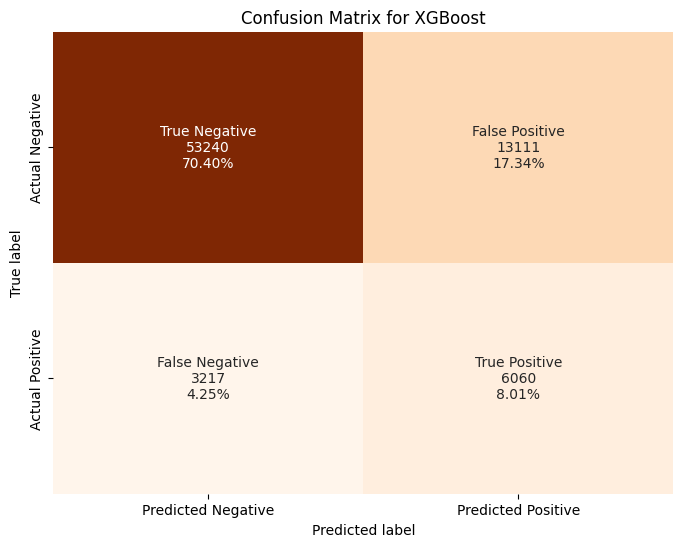

In [130]:
# Evaluate with SMOTE
results_with_smote = evaluate_model(classifiers, X_train_smote, y_train_smote, X_test_scaled, y_test)